# Cancer Detection

Import all necessary libraries and sci-kit learn models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
cancer_df=pd.read_csv('cancer.csv')

In [4]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
y = cancer_df.diagnosis   # M or B 
items = ['Unnamed: 32','id','diagnosis']
x = cancer_df.drop(items,axis = 1 )  #drop two columns
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
cancer_df.loc[390:405,:]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
390,90317302,B,10.260,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.019680,...,15.65,73.23,394.5,0.13430,0.16500,0.08615,0.06696,0.2937,0.07722,NaN
391,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.000000,...,22.80,64.01,317.0,0.14600,0.13100,0.00000,0.00000,0.2445,0.08865,NaN
392,903507,M,15.490,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.091130,...,29.41,142.10,1359.0,0.16810,0.39130,0.55530,0.21210,0.3187,0.10190,NaN
393,903516,M,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.156200,...,28.74,172.00,2081.0,0.15020,0.57170,0.70530,0.24220,0.3828,0.10070,NaN
394,903554,B,12.100,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.033260,...,25.80,88.33,559.5,0.14320,0.17730,0.16030,0.06266,0.3049,0.07081,NaN
395,903811,B,14.060,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.032510,...,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609,NaN
396,90401601,B,13.510,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.053810,...,27.20,97.33,675.2,0.14280,0.25700,0.34380,0.14530,0.2666,0.07686,NaN
397,90401602,B,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.040830,...,21.06,90.72,591.0,0.09534,0.18120,0.19010,0.08296,0.1988,0.07053,NaN
398,904302,B,11.060,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,...,20.35,80.79,496.7,0.11200,0.18790,0.20790,0.05556,0.2590,0.09158,NaN
399,904357,B,11.800,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.016380,...,24.49,86.00,562.0,0.12440,0.17260,0.14490,0.05356,0.2779,0.08121,NaN


# Visualization

B    357
M    212
Name: diagnosis, dtype: int64


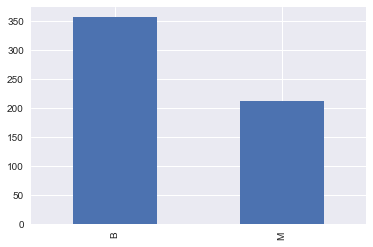

In [8]:
print(y.value_counts())
y.value_counts().plot.bar()

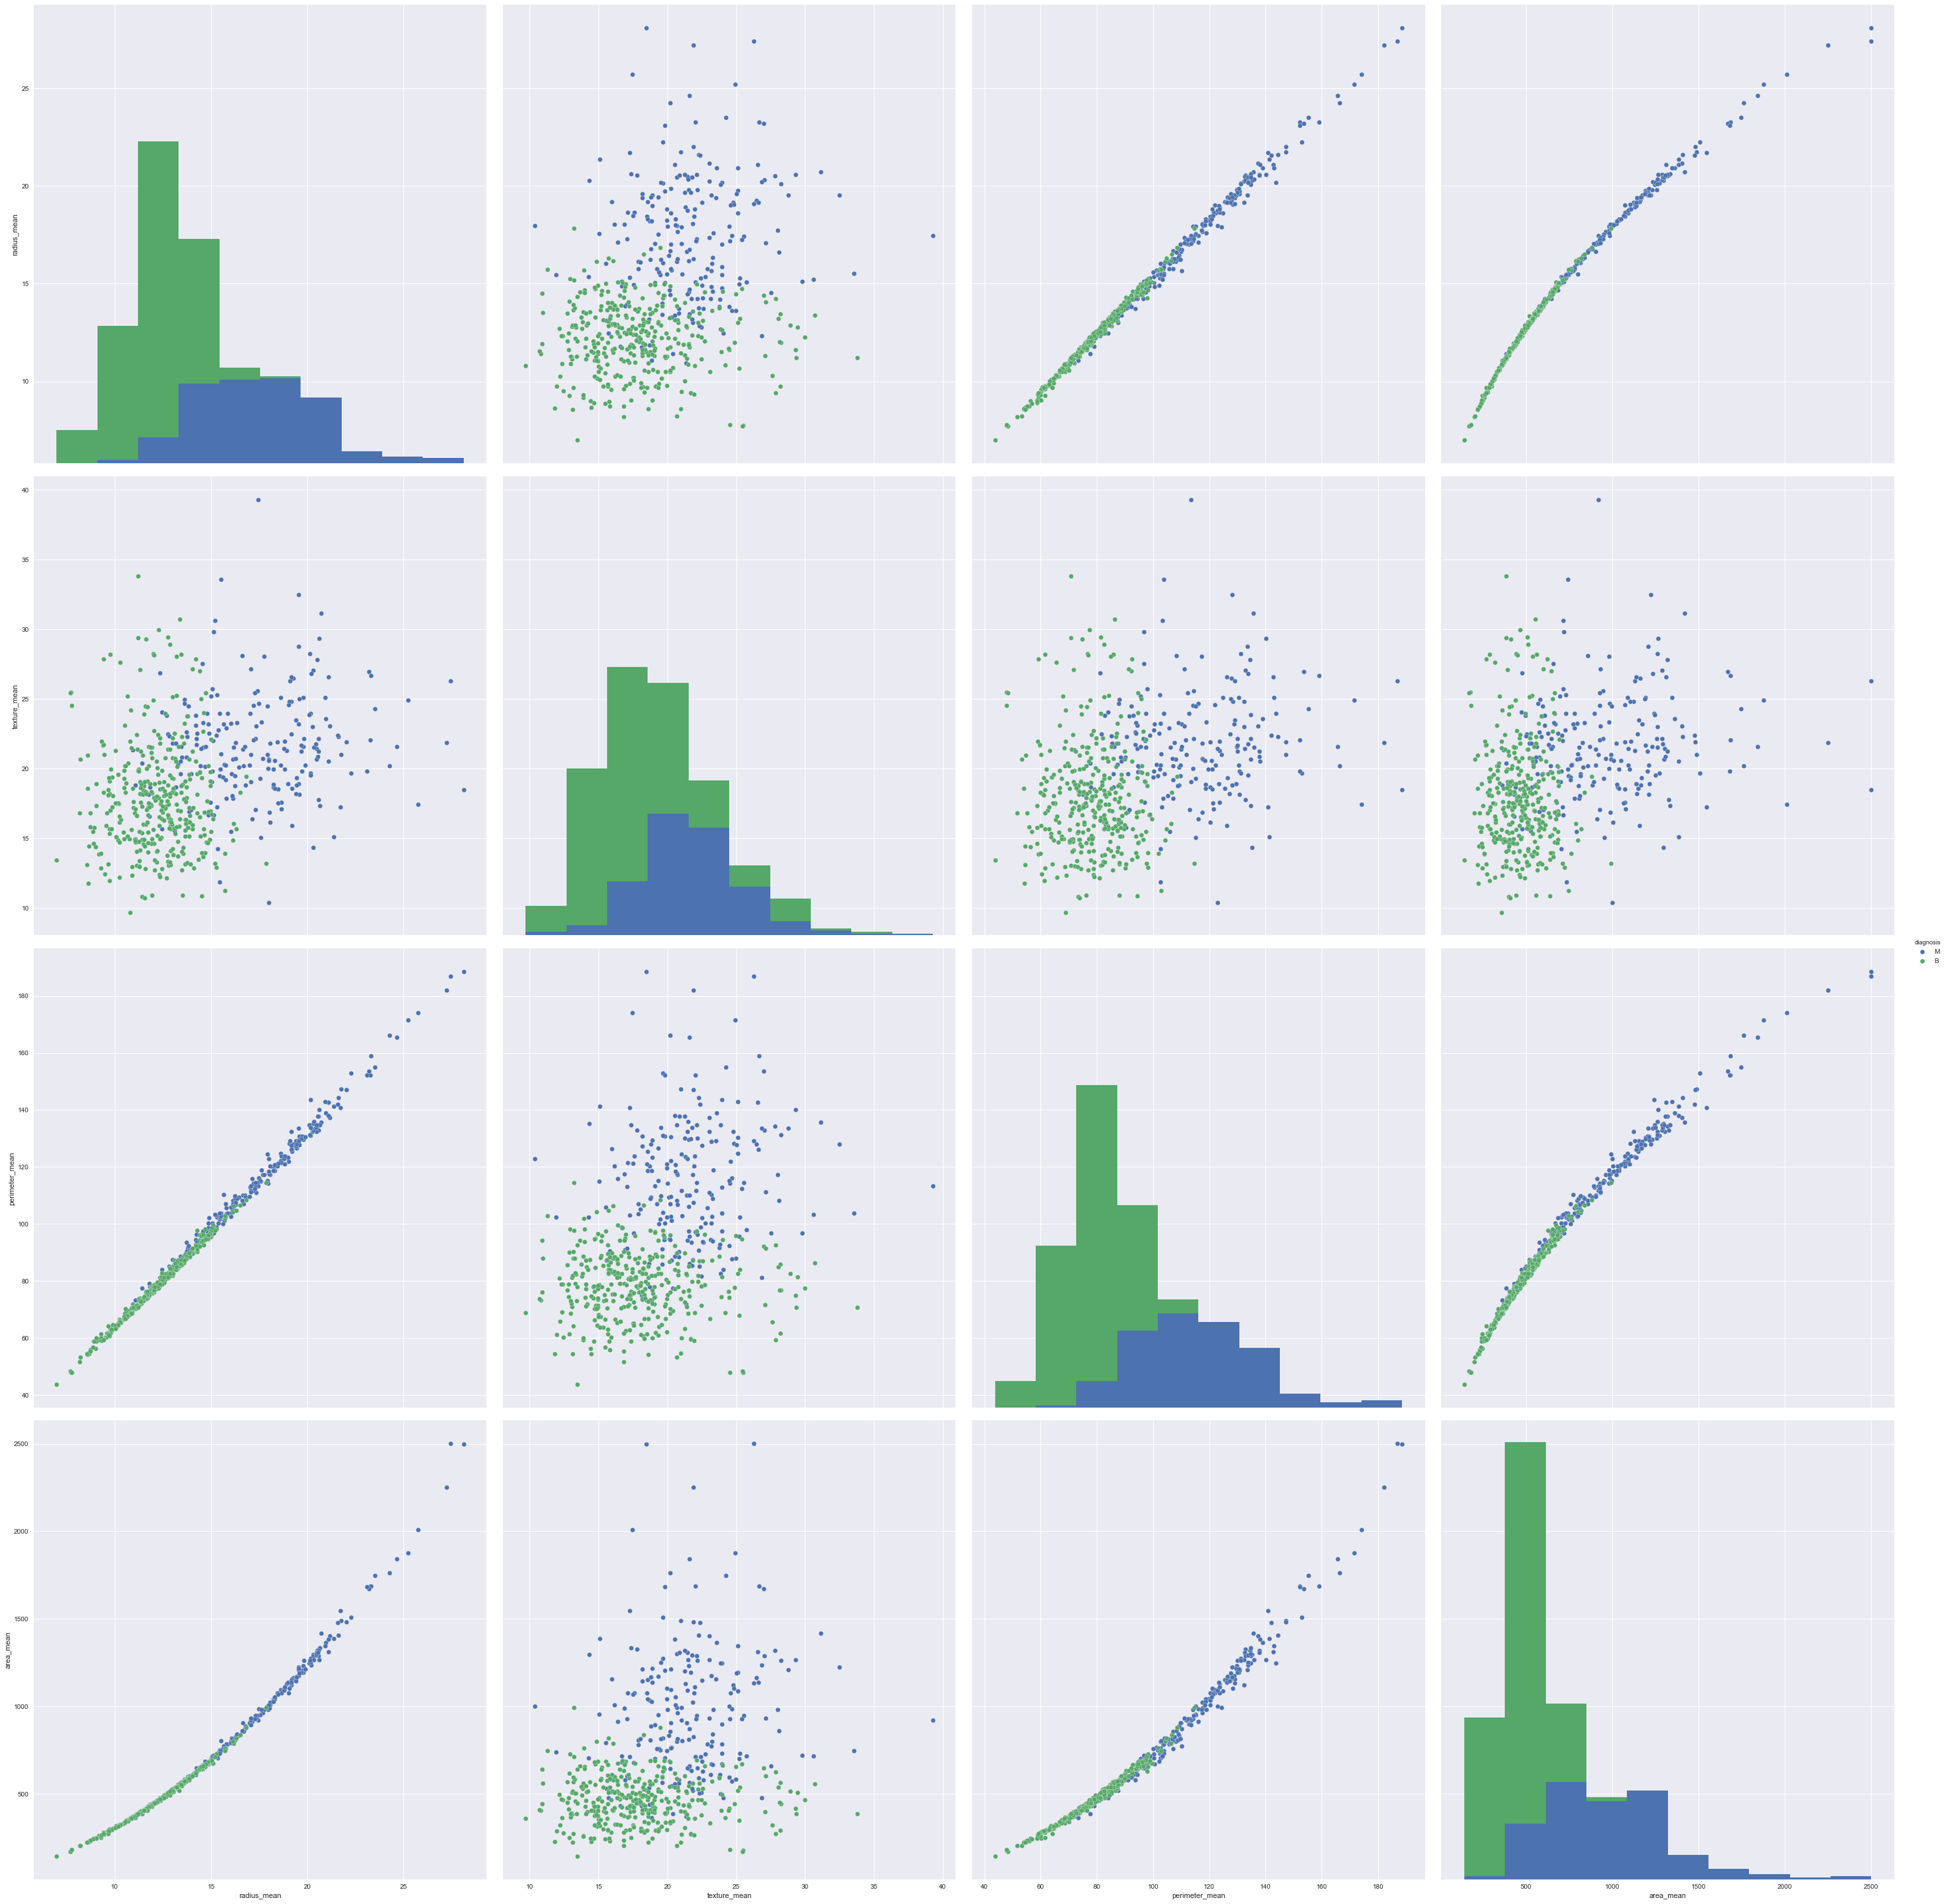

In [9]:
sns.pairplot(cancer_df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean']],hue='diagnosis',size=10)

Use Violin Plot to view similarities and check correlation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

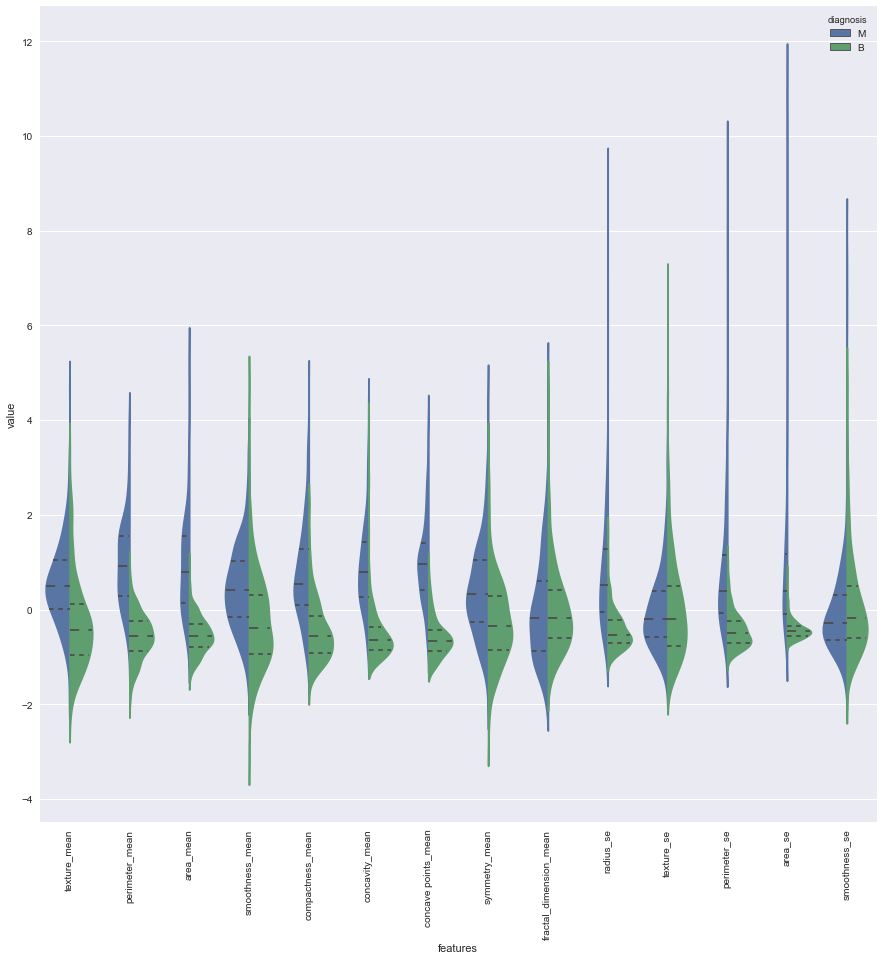

In [10]:
#First 15 features
data_target=y
data=x
data_n_2=(data-data.mean())/(data.std()) #Normalization
data=pd.concat([y,data_n_2.iloc[:,1:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

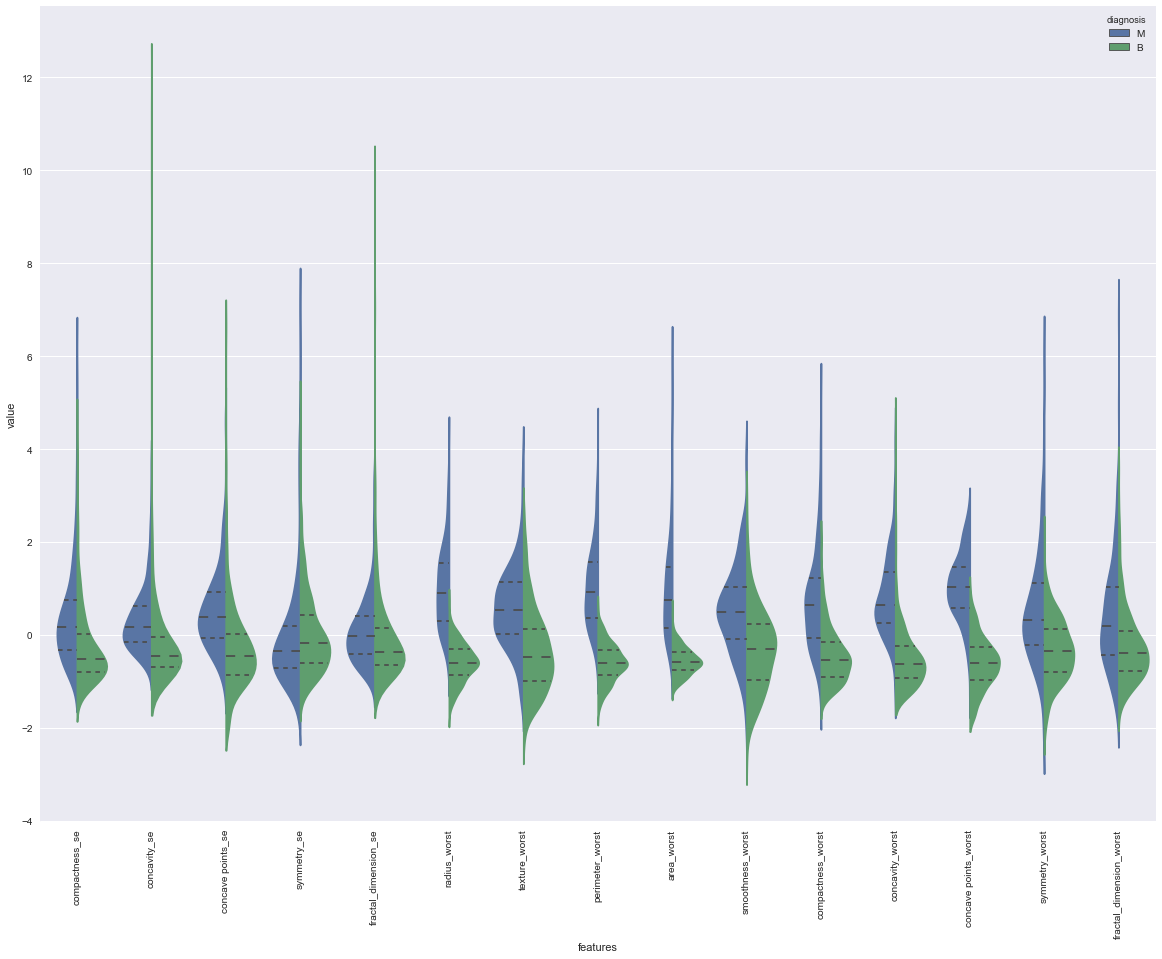

In [11]:
data=pd.concat([y,data_n_2.iloc[:,15:]],axis=1)
data=pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(20,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

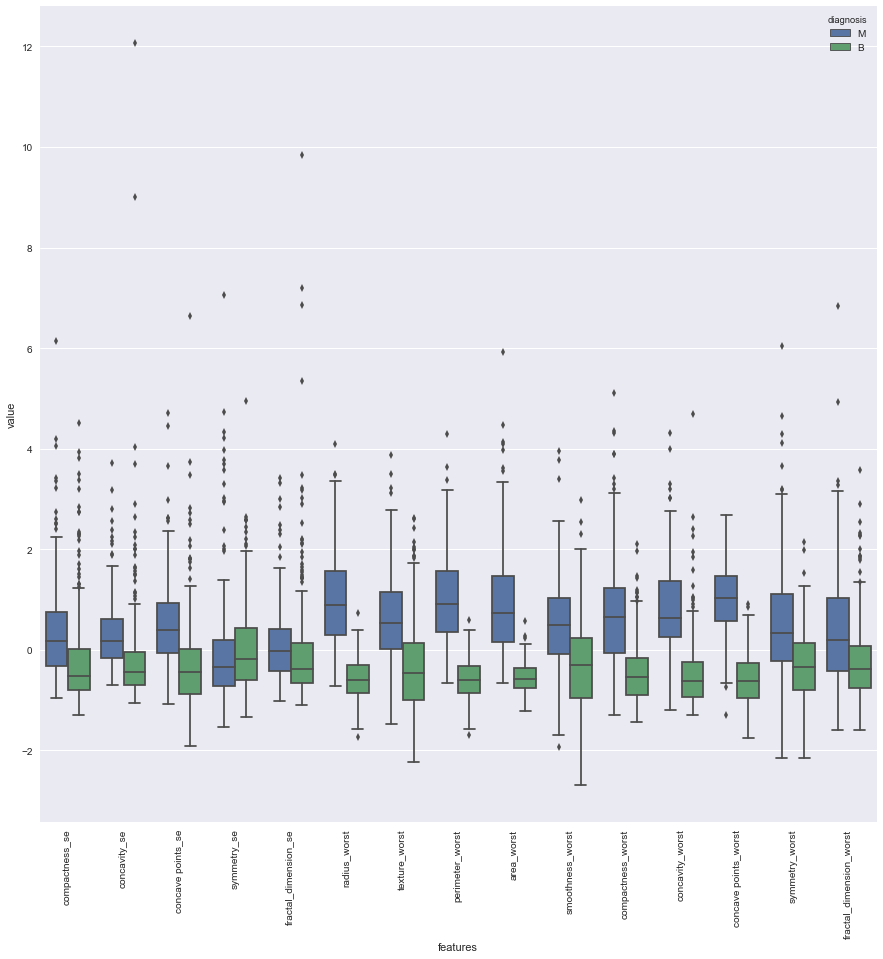

In [12]:
##Using Boxplot
sns.set(style='darkgrid')
plt.figure(figsize=(15,15))
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=90)

In [13]:
#cancer_df['diagnosis']=cancer_df['diagnosis'].map({'M':0,'B':1})

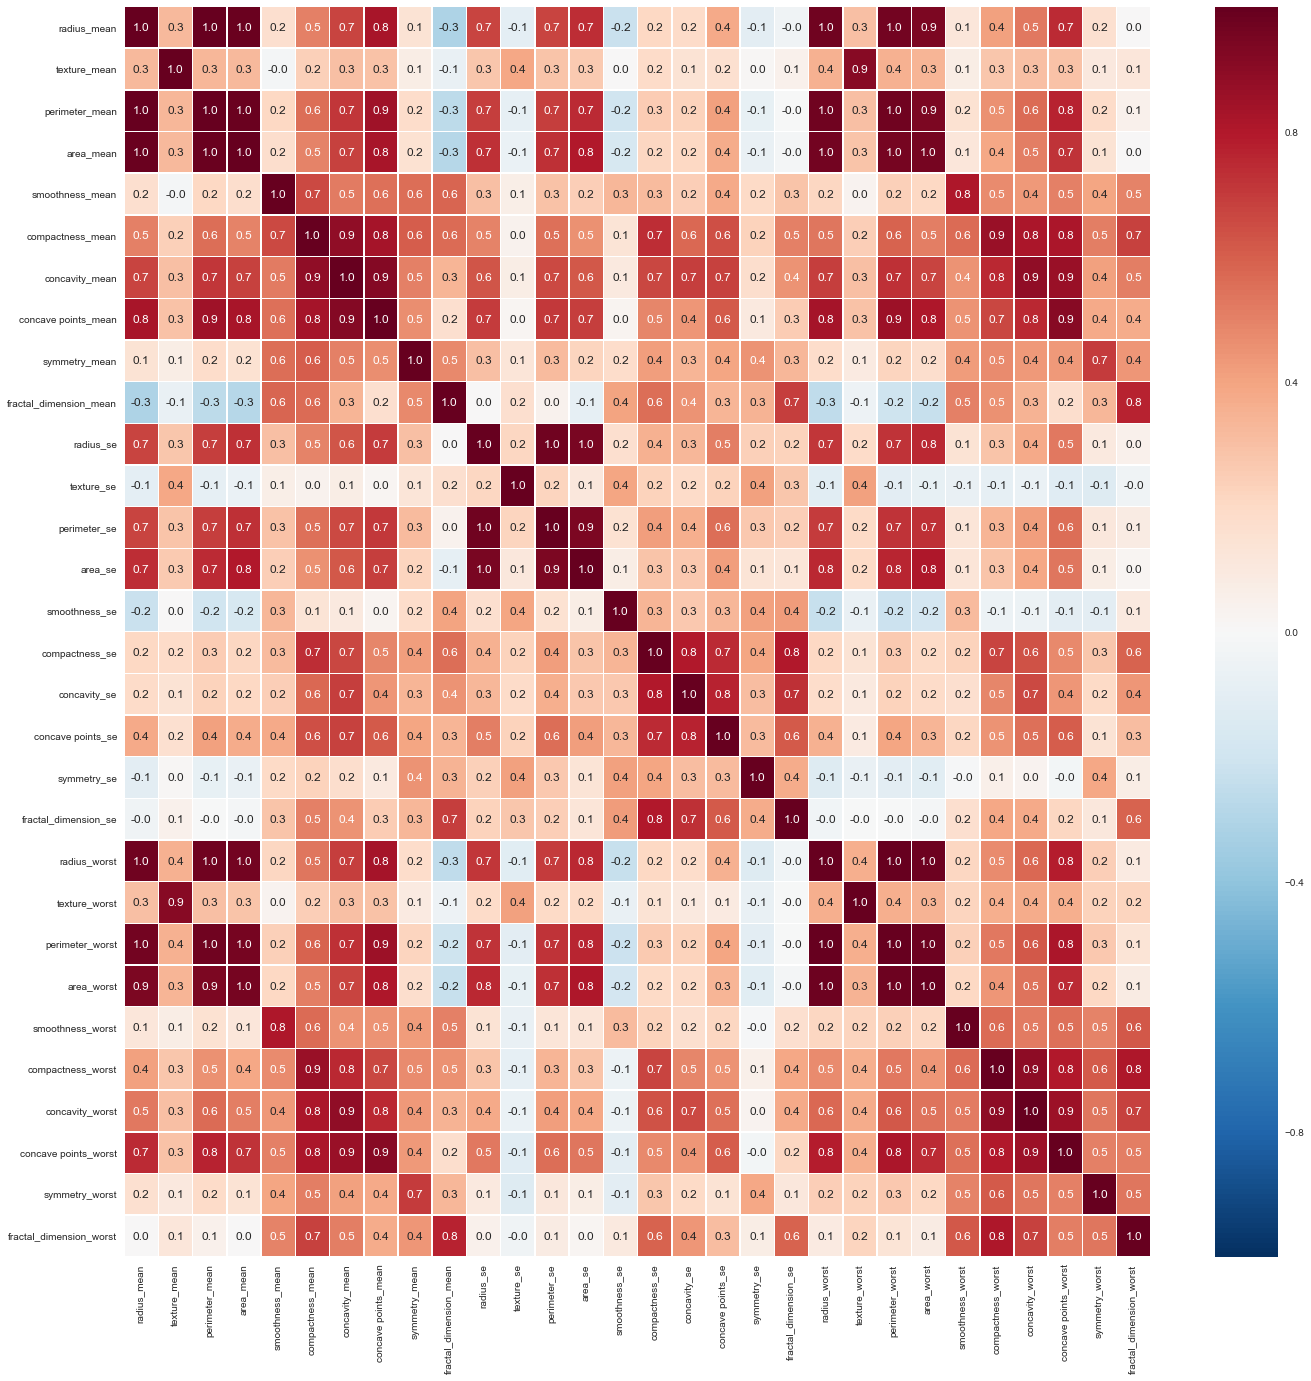

In [14]:
#Check correlation of features
f,ax = plt.subplots(figsize=(23, 23))
sns.heatmap(x.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

In [15]:
# Malignant = 0, 
# Benign =1

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Machine Learning Models i.e mirror moment

1. Logstic Regression

In [18]:
log_reg=LogisticRegression(random_state=2)
log_reg.fit(x_train,y_train)
log_reg_pred=log_reg.predict(x_test)
lr_score=accuracy_score(y_test,log_reg_pred)

In [19]:
log_reg.score(x_test,y_test)

0.96491228070175439

 SVC

In [20]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
svc_score=accuracy_score(y_test,svc_pred)
svc_score

0.63157894736842102

Random Forest Classifier

In [21]:
rf=RandomForestClassifier(n_estimators=2)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_score=accuracy_score(y_test,rf_pred)
rf_score

0.92982456140350878

Linear SVC

In [22]:
lsvc=LinearSVC(random_state=2)
lsvc.fit(x_train,y_train)
lsvc_pred=lsvc.predict(x_test)
lsvc_score=accuracy_score(y_test,lsvc_pred)
lsvc_score

0.9707602339181286

K Nearest Neighbour

In [23]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_score=accuracy_score(y_test,knn_pred)
knn_score

0.93567251461988299

In [24]:
#Stochastic Gradient Descent
sgd=SGDClassifier(random_state=14)
sgd.fit(x_train,y_train)
sgd_pred=sgd.predict(x_test)
sgd_score=accuracy_score(y_test,sgd_pred)
sgd_score

0.94152046783625731

In [25]:
models_df=pd.DataFrame({'Model':['Random Forest','Stochastic Gradient Descent','Logistic Regression',
                                 'LinearSVC','K Nearest Neighbour','SVC'],
                       'Accuracy':[rf_score,sgd_score,lr_score,lsvc_score,knn_score,svc_score]})
models_df.sort_values(by='Accuracy',ascending=False)

,Accuracy,Model
3,0.970760,LinearSVC
2,0.964912,Logistic Regression
1,0.941520,Stochastic Gradient Descent
4,0.935673,K Nearest Neighbour
0,0.929825,Random Forest
5,0.631579,SVC


# Performance Measures

#1. Using Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(lsvc,x_train,y_train,cv=3,scoring='accuracy')

array([ 0.90977444,  0.91729323,  0.91666667])

In [27]:
cross_val_score(log_reg,x_train,y_train,cv=3,scoring='accuracy')

array([ 0.93233083,  0.97744361,  0.93181818])

Make Clean Predictions

In [28]:
log_reg_y_pred=cross_val_predict(log_reg,x_train,y_train,cv=3)

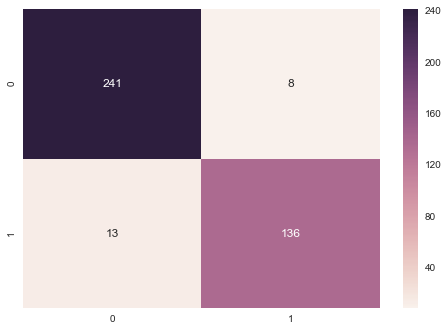

In [29]:
#Evaluation on Training data using Logistic Regression
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score
cm=confusion_matrix(y_train,log_reg_y_pred)
sns.heatmap(cm,annot=True,fmt='d')

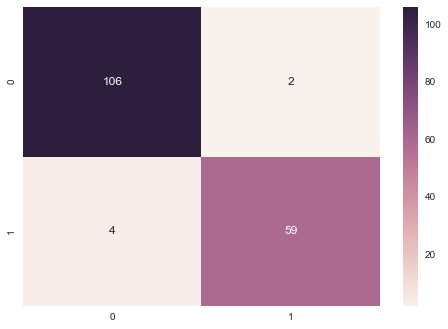

In [30]:
#Evaluation of Test data using LR
cm1=confusion_matrix(y_test,log_reg_pred)
sns.heatmap(cm1,annot=True,fmt='d')

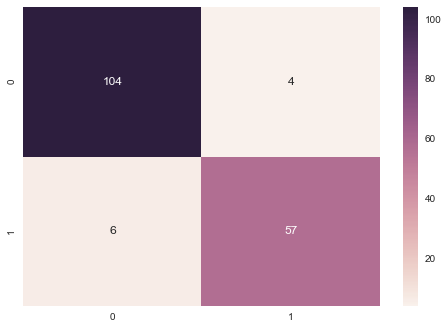

In [31]:
#Evaluation of Test data using SGD
cm2=confusion_matrix(y_test,sgd_pred)
sns.heatmap(cm2,annot=True,fmt='d')

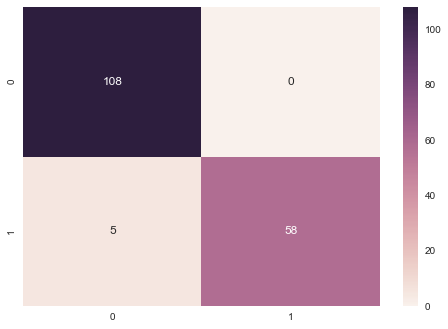

In [32]:
#Evaluation of Test data using LSVC
cm3=confusion_matrix(y_test,lsvc_pred)
sns.heatmap(cm3,annot=True,fmt='d')

In [33]:
log_reg_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [34]:
#f1_score(y_test,log_reg_pred)
#recall_score(y_train,log_reg_y_pred)
#print('Five',5)


# Reducing Features

In [35]:
from sklearn.feature_selection import chi2,SelectKBest
#k can be any number, let's use k=7
features=SelectKBest(chi2,k=7).fit(x_train,y_train)
KBest_df=pd.DataFrame({'Feature':x_train.columns,'Score':features.scores_},index=None)
KBest_df.sort_values(by='Score',ascending=False)

,Feature,Score
23,area_worst,75021.734079
3,area_mean,36689.955660
13,area_se,6127.410670
22,perimeter_worst,2405.128351
2,perimeter_mean,1340.610924
20,radius_worst,325.782599
0,radius_mean,177.946492
12,perimeter_se,172.696840
21,texture_worst,116.958562
1,texture_mean,60.691643


In [36]:
x2_train=features.transform(x_train)
x2_test=features.transform(x_test)

lsvc1=LinearSVC(random_state=12)
lsvc1.fit(x2_train,y_train)
lsvc1_pred=lsvc1.predict(x2_test)
lsvc1_score=accuracy_score(y_test,lsvc1_pred)
lsvc1_score

0.95906432748538006

In [37]:
log_reg_1=LogisticRegression()
log_reg_1.fit(x2_train,y_train)
log_reg_1_pred=log_reg_1.predict(x2_test)
log_reg_1_score=accuracy_score(y_test,log_reg_1_pred)
log_reg_1_score

0.98245614035087714

In [38]:
rf1=RandomForestClassifier(n_estimators=7)
rf1.fit(x2_train,y_train)
rf1_pred=rf1.predict(x2_test)
rf1_score=accuracy_score(y_test,rf1_pred)
rf1_score

0.92982456140350878

# Thank You